In [112]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [113]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split
 
train_generator = train_datagen.flow_from_directory(
    './data/image/tigerlion',
    target_size=(98, 98),
    batch_size=160,
    class_mode='binary',
    subset='training') # set as training data
 
test_generator = train_datagen.flow_from_directory(
    './data/image/tigerlion', # same directory as training data
    target_size=(98, 98),
    batch_size=50,
    class_mode='binary',
    subset='validation') # set as validation data

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [114]:
X_train, y_train = train_generator.next()
X_test, y_test = test_generator.next()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 98, 98, 3), (160,), (40, 98, 98, 3), (40,))

In [115]:
# 타겟값 확인
trainGen.class_indices

{'lion': 0, 'tiger': 1}

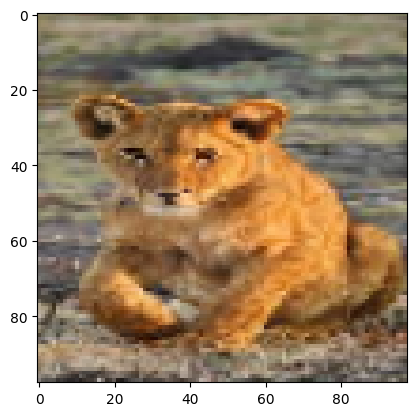

In [116]:
plt.imshow(X_train[0])
plt.show()

In [117]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), strides = 1, input_shape = (98,98,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (4,4), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) 
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 32)        8224      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 16928)             0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [118]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [119]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
5/5 [==============================] - 1s 116ms/step - loss: 0.7522 - acc: 0.4875
Epoch 2/10
5/5 [==============================] - 1s 116ms/step - loss: 0.6539 - acc: 0.5875
Epoch 3/10
5/5 [==============================] - 1s 117ms/step - loss: 0.6109 - acc: 0.6750
Epoch 4/10
5/5 [==============================] - 1s 117ms/step - loss: 0.5225 - acc: 0.7812
Epoch 5/10
5/5 [==============================] - 1s 121ms/step - loss: 0.5001 - acc: 0.7750
Epoch 6/10
5/5 [==============================] - 1s 128ms/step - loss: 0.5569 - acc: 0.7125
Epoch 7/10
5/5 [==============================] - 1s 120ms/step - loss: 0.3686 - acc: 0.8750
Epoch 8/10
5/5 [==============================] - 1s 117ms/step - loss: 0.3311 - acc: 0.8875
Epoch 9/10
5/5 [==============================] - 1s 116ms/step - loss: 0.2708 - acc: 0.9312
Epoch 10/10
5/5 [==============================] - 1s 134ms/step - loss: 0.1945 - acc: 0.9187


In [125]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [124]:
model.predict(X_train)

5/5 [==============================] - 0s 33ms/step


array([[9.39469934e-01, 6.05300255e-02],
       [3.98319691e-01, 6.01680279e-01],
       [1.21277668e-01, 8.78722370e-01],
       [2.19504237e-02, 9.78049576e-01],
       [9.38017190e-01, 6.19828440e-02],
       [9.82436419e-01, 1.75635740e-02],
       [9.15384948e-01, 8.46150592e-02],
       [5.42449467e-02, 9.45755064e-01],
       [8.98773611e-01, 1.01226412e-01],
       [8.73141170e-01, 1.26858830e-01],
       [9.19554949e-01, 8.04450810e-02],
       [9.83213007e-01, 1.67870726e-02],
       [9.16932285e-01, 8.30677003e-02],
       [6.54753327e-01, 3.45246673e-01],
       [9.39991236e-01, 6.00086786e-02],
       [8.84335637e-02, 9.11566436e-01],
       [1.69145484e-02, 9.83085454e-01],
       [9.14201915e-01, 8.57980624e-02],
       [9.38972950e-01, 6.10270463e-02],
       [2.51115151e-02, 9.74888444e-01],
       [9.07743931e-01, 9.22560394e-02],
       [9.48415518e-01, 5.15844487e-02],
       [8.38214815e-01, 1.61785260e-01],
       [1.50015920e-01, 8.49984109e-01],
       [7.937104

In [126]:
print(classification_report(y_train.argmax(axis = 1), model.predict(X_train).argmax(axis = 1)))

5/5 [==============================] - 0s 33ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        80
           1       1.00      0.95      0.97        80

    accuracy                           0.97       160
   macro avg       0.98      0.97      0.97       160
weighted avg       0.98      0.97      0.97       160



In [129]:
y_test = to_categorical(y_test)

In [130]:
print(classification_report(y_test.argmax(axis = 1), model.predict(X_test).argmax(axis = 1)))

2/2 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

